In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = [15,8] 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
final_df = pd.read_csv('/content/drive/MyDrive/Healthcare_fraud.csv')
final_df = final_df.drop('ClaimID',axis=1)
final_df.head()

,PotentialFraud,InscClaimAmtReimbursed,DeductibleAmtPaid,Gender,Race,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,IPAnnualReimbursementAmt,...,Age,Days_stayed_inhospital,Patient_visitType,DeadorNot,Days_to_settle_claim,Total_PhysiciansChecked,Repeted_Physician,TotalClmDiagnosisCount,TotalClmProcedureCount,TotalDiseaseCount
0,0,500,0.0,1,1,1,410,12,12,2020,...,74.0,0.0,0.0,0.0,1,2,0.0,1,0,8
1,0,36000,1068.0,1,1,1,510,12,12,36000,...,69.0,4.0,1.0,0.0,4,1,0.0,3,0,6
2,0,12000,1068.0,1,1,1,160,12,12,95000,...,72.0,2.0,1.0,0.0,2,1,0.0,1,0,1
3,0,70,0.0,1,1,1,510,12,12,5000,...,91.0,0.0,0.0,0.0,0,1,0.0,4,0,4
4,0,3000,1068.0,2,1,1,510,12,12,3000,...,75.0,5.0,1.0,0.0,5,1,0.0,2,0,6


In [ ]:
# sns.pairplot(final_df, diag_kind=True)

In [ ]:
final_df.columns 

Index(['PotentialFraud', 'InscClaimAmtReimbursed', 'DeductibleAmtPaid',
       'Gender', 'Race', 'State', 'County', 'NoOfMonths_PartACov',
       'NoOfMonths_PartBCov', 'IPAnnualReimbursementAmt',
       'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt',
       'OPAnnualDeductibleAmt', 'Age', 'Days_stayed_inhospital',
       'Patient_visitType', 'DeadorNot', 'Days_to_settle_claim',
       'Total_PhysiciansChecked', 'Repeted_Physician',
       'TotalClmDiagnosisCount', 'TotalClmProcedureCount',
       'TotalDiseaseCount'],
      dtype='object')

In [ ]:
final_df_num = final_df[['InscClaimAmtReimbursed', 'DeductibleAmtPaid','NoOfMonths_PartACov',
                         'NoOfMonths_PartBCov', 'IPAnnualReimbursementAmt',
                         'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt',
                         'OPAnnualDeductibleAmt', 'Age', 'Days_stayed_inhospital',
                        'Days_to_settle_claim','Total_PhysiciansChecked','TotalClmDiagnosisCount',
                         'TotalClmProcedureCount','TotalDiseaseCount']]

final_df_cat= final_df.drop(['InscClaimAmtReimbursed', 'DeductibleAmtPaid','NoOfMonths_PartACov',
                         'NoOfMonths_PartBCov', 'IPAnnualReimbursementAmt',
                         'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt',
                         'OPAnnualDeductibleAmt', 'Age', 'Days_stayed_inhospital',
                        'Days_to_settle_claim','Total_PhysiciansChecked','TotalClmDiagnosisCount',
                         'TotalClmProcedureCount','TotalDiseaseCount'],axis=1)

In [ ]:
final_df_num.shape

(558211, 15)

In [ ]:
final_df_cat.shape 

(558211, 8)

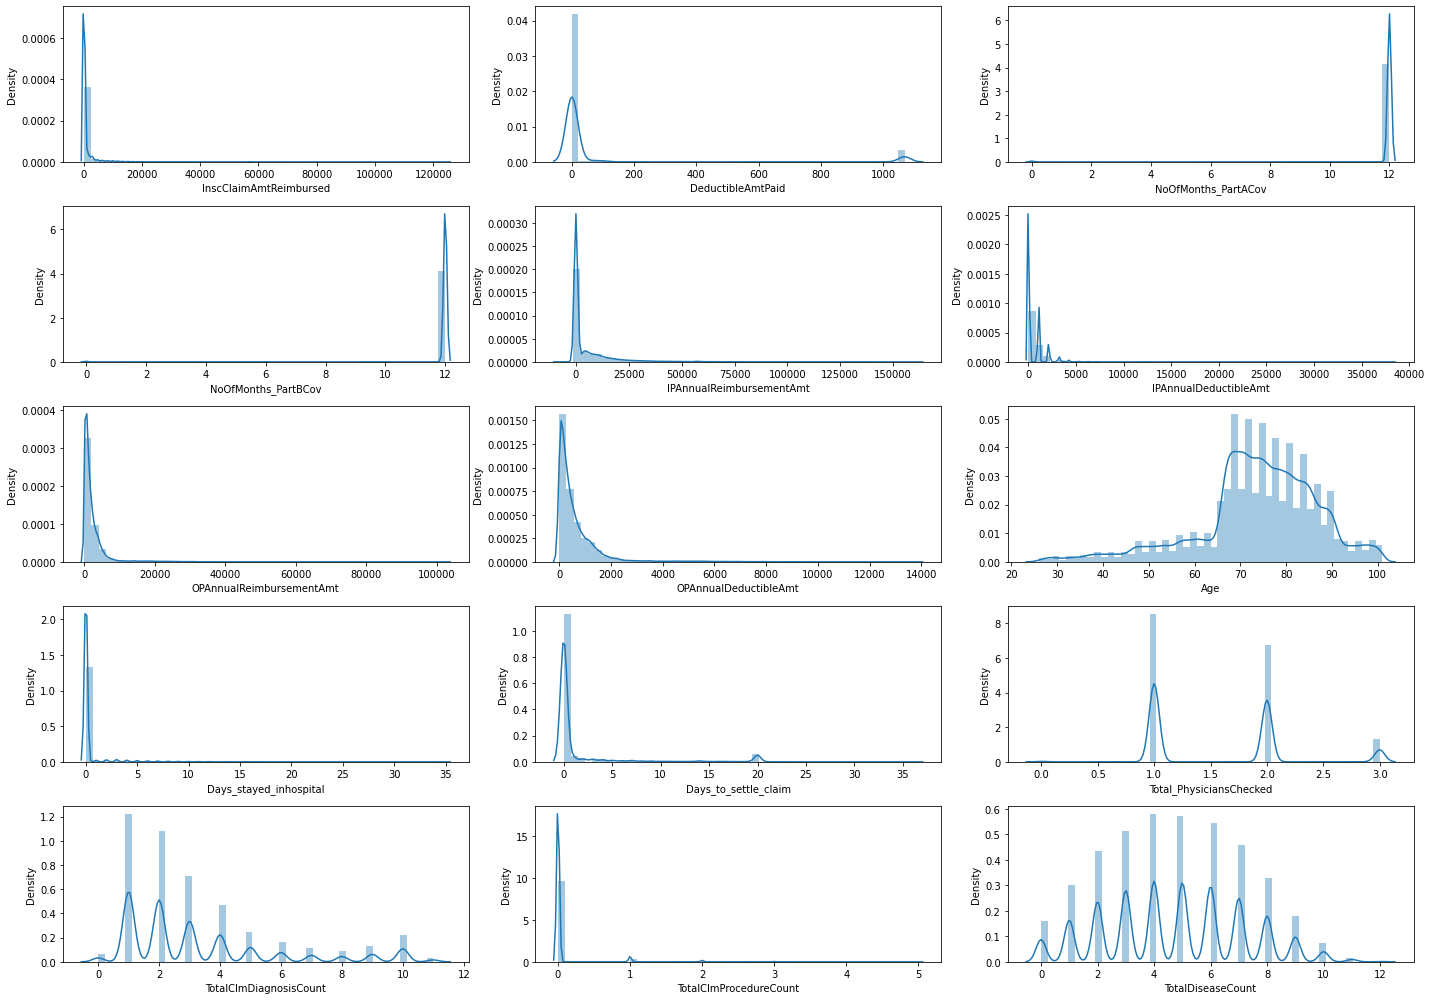

In [ ]:
fig,ax = plt.subplots(nrows=5,ncols=3, figsize=(20,14))
for i,v in zip(final_df_num.columns, ax.flatten()):
  sns.distplot(final_df_num[i], ax= v)

plt.tight_layout()
plt.show()

## Numeric vs Categorical(Target) Stat. Test

In [ ]:
from scipy import stats

NUll : Data is Normal / skew=0

Altr : Data is Not Normal / skew != 0

In [ ]:
p_val= []
for i in final_df_num.columns:
  pvalue = stats.shapiro(final_df_num[i])[1]
  p_val.append(pvalue)

print(p_val)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [ ]:
## As for all the numerical featutes we have found that the p-value <0.05 
## so we reject the H0 , so we can conclude that data is not normal.
## Same thing we are able to conclude from the distribution plots done in EDA.  

## null : Var is Equal 
    
## Altr : Var is Not Equal

In [ ]:
p_val= []
for i in final_df_num.columns:
  pvalue = stats.levene(final_df_num[i],final_df['PotentialFraud'])[1]
  p_val.append(pvalue)

print(p_val)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.3198887789700883e-24, 0.0, 0.0, 0.0, 0.0, 0.0]


In [ ]:
## As for all Numerical features the p-value <0.05 
## so we reject the H0 , so we can conclude that variences are not equal.

## As we can see that the features distibution is not normal and they dont have equal varience so we have to go for Non-Parametric Test

## We will go for MannWhitneyu test

## NUll : The means are equal, so not statistically significant

## Altr : The means are not equal, they are far away, statistically significant.

In [ ]:
final_df_num = final_df[['PotentialFraud','InscClaimAmtReimbursed', 'DeductibleAmtPaid','NoOfMonths_PartACov',
                         'NoOfMonths_PartBCov', 'IPAnnualReimbursementAmt',
                         'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt',
                         'OPAnnualDeductibleAmt', 'Age', 'Days_stayed_inhospital',
                        'Days_to_settle_claim','Total_PhysiciansChecked','TotalClmDiagnosisCount',
                         'TotalClmProcedureCount','TotalDiseaseCount']]

In [ ]:
final_df_num['PotentialFraud'].value_counts()

0    345415
1    212796
Name: PotentialFraud, dtype: int64

In [ ]:
pval ={}

for i in final_df_num.columns:
  if i == 'PotentialFraud':
    continue
  else:
    p_value = stats.mannwhitneyu(final_df_num[final_df_num['PotentialFraud']== 0][i],  final_df_num[final_df_num['PotentialFraud']== 1][i])[1]
    pval.update({i:p_value})


{key:value for (key,value) in pval.items()}

{'Age': 1.1683727437179946e-10,
 'Days_stayed_inhospital': 0.0,
 'Days_to_settle_claim': 0.0,
 'DeductibleAmtPaid': 0.0,
 'IPAnnualDeductibleAmt': 1.1647762070853345e-257,
 'IPAnnualReimbursementAmt': 3.3208283387829644e-245,
 'InscClaimAmtReimbursed': 7.575700740775726e-290,
 'NoOfMonths_PartACov': 8.567584705443157e-06,
 'NoOfMonths_PartBCov': 0.19089833755215163,
 'OPAnnualDeductibleAmt': 3.7664505031202693e-05,
 'OPAnnualReimbursementAmt': 3.5579705823098955e-05,
 'TotalClmDiagnosisCount': 1.9669585548006024e-13,
 'TotalClmProcedureCount': 9.04748623460157e-45,
 'TotalDiseaseCount': 1.3808911391214714e-27,
 'Total_PhysiciansChecked': 1.8221120837812875e-21}

In [ ]:
## In above whereever we find p-value >0.05, there we fail to reject the H0, so those features are insignificant. 

## So the Numerical significant features are:  InscClaimAmtReimbursed, DeductibleAmtPaid,NoOfMonths_PartACov,IPAnnualReimbursementAmt,
##                                               IPAnnualDeductibleAmt, OPAnnualReimbursementAmt,OPAnnualDeductibleAmt, Age,  
##                                               Days_stayed_inhospital,Days_to_settle_claim,Total_PhysiciansChecked
##                                               ,TotalClmDiagnosisCount, 'TotalClmProcedureCount','TotalDiseaseCount'

## categorical vs Category(Target) Stat. Test

In [ ]:
final_df_cat.head()

,PotentialFraud,Gender,Race,State,County,Patient_visitType,DeadorNot,Repeted_Physician
0,0,1,1,1,410,0.0,0.0,0.0
1,0,1,1,1,510,1.0,0.0,0.0
2,0,1,1,1,160,1.0,0.0,0.0
3,0,1,1,1,510,0.0,0.0,0.0
4,0,2,1,1,510,1.0,0.0,0.0


In [ ]:
final_df_cat['Patient_visitType'].value_counts()

0.0    517737
1.0     40474
Name: Patient_visitType, dtype: int64

In [ ]:
stats.chi2_contingency(pd.crosstab(final_df_cat['PotentialFraud'],final_df_cat['County']))[1]

0.0

In [ ]:
## as p-value<0.5, County is significant 

In [ ]:
stats.chi2_contingency(pd.crosstab(final_df_cat['PotentialFraud'],final_df_cat['State']))[1]

0.0

In [ ]:
## as p-value<0.5, State is significant 

In [ ]:
pd.crosstab(final_df_cat['PotentialFraud'],final_df_cat['Gender'])

Gender,1,2
PotentialFraud,,
0,145414,200001
1,89683,123113


In [ ]:
import statsmodels as sm

In [ ]:
df_nl = final_df_cat[final_df_cat['PotentialFraud'] == 0]
df_sg = final_df_cat[final_df_cat['PotentialFraud'] == 1]

n_1 = len(df_nl)
n_2 = len(df_sg)


l_1 = len(df_nl[df_nl['Gender'] == 1])
l_2 = len(df_sg[df_sg['Gender'] == 1])

In [ ]:
import statsmodels.api as sm
sm.stats.proportions_ztest(count = np.array([l_1, l_2]),nobs = np.array([n_1, n_2]),alternative='two-sided')[1]

0.7313608396662625

In [ ]:
## So Gender is not significant

In [ ]:
df_nl = final_df_cat[final_df_cat['PotentialFraud'] == 0]
df_sg = final_df_cat[final_df_cat['PotentialFraud'] == 1]

n_1 = len(df_nl)
n_2 = len(df_sg)


l_1 = len(df_nl[df_nl['Race'] == 1])
l_2 = len(df_sg[df_sg['Race'] == 1])

sm.stats.proportions_ztest(count = np.array([l_1, l_2]),nobs = np.array([n_1, n_2]),alternative='two-sided')[1]

2.1704265129162852e-20

In [ ]:
## So Race is significant

In [ ]:
df_nl = final_df_cat[final_df_cat['PotentialFraud'] == 0]
df_sg = final_df_cat[final_df_cat['PotentialFraud'] == 1]

n_1 = len(df_nl)
n_2 = len(df_sg)


l_1 = len(df_nl[df_nl['Patient_visitType'] == 1])
l_2 = len(df_sg[df_sg['Patient_visitType'] == 1])

sm.stats.proportions_ztest(count = np.array([l_1, l_2]),nobs = np.array([n_1, n_2]),alternative='two-sided')[1]

0.0

In [ ]:
## so Patient_visitType is significant

In [ ]:
df_nl = final_df_cat[final_df_cat['PotentialFraud'] == 0]
df_sg = final_df_cat[final_df_cat['PotentialFraud'] == 1]

n_1 = len(df_nl)
n_2 = len(df_sg)


l_1 = len(df_nl[df_nl['DeadorNot'] == 1])
l_2 = len(df_sg[df_sg['DeadorNot'] == 1])

sm.stats.proportions_ztest(count = np.array([l_1, l_2]),nobs = np.array([n_1, n_2]),alternative='two-sided')[1]

0.32230337793643193

In [ ]:
## So DeadorNot is not significant

In [ ]:
df_nl = final_df_cat[final_df_cat['PotentialFraud'] == 0]
df_sg = final_df_cat[final_df_cat['PotentialFraud'] == 1]

n_1 = len(df_nl)
n_2 = len(df_sg)


l_1 = len(df_nl[df_nl['Repeted_Physician'] == 1])
l_2 = len(df_sg[df_sg['Repeted_Physician'] == 1])

sm.stats.proportions_ztest(count = np.array([l_1, l_2]),nobs = np.array([n_1, n_2]),alternative='two-sided')[1]

0.0

In [ ]:
## so Repeted_Physician is significant

In [ ]:
## So the significant categorical columns are : County,State,Race,Patient_visitType,Repeted_Physician

In [ ]:
Sig_feature = final_df[['County','State','Race','Patient_visitType','Repeted_Physician','InscClaimAmtReimbursed', 'DeductibleAmtPaid','NoOfMonths_PartACov',
                'IPAnnualReimbursementAmt','IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt','OPAnnualDeductibleAmt', 'Age', 'Days_stayed_inhospital', 
                'Days_to_settle_claim','Total_PhysiciansChecked','TotalClmDiagnosisCount', 'TotalClmProcedureCount','TotalDiseaseCount']]

In [ ]:
Sig_feature.head()

,County,State,Race,Patient_visitType,Repeted_Physician,InscClaimAmtReimbursed,DeductibleAmtPaid,NoOfMonths_PartACov,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age,Days_stayed_inhospital,Days_to_settle_claim,Total_PhysiciansChecked,TotalClmDiagnosisCount,TotalClmProcedureCount,TotalDiseaseCount
0,410,1,1,0.0,0.0,500,0.0,12,2020,1068,6700,2700,74.0,0.0,1,2,1,0,8
1,510,1,1,1.0,0.0,36000,1068.0,12,36000,1068,3520,140,69.0,4.0,4,1,3,0,6
2,160,1,1,1.0,0.0,12000,1068.0,12,95000,2136,2270,900,72.0,2.0,2,1,1,0,1
3,510,1,1,0.0,0.0,70,0.0,12,5000,1068,370,70,91.0,0.0,0,1,4,0,4
4,510,1,1,1.0,0.0,3000,1068.0,12,3000,1068,0,0,75.0,5.0,5,1,2,0,6


In [ ]:
Sig_feature.shape

(558211, 19)

## Run Model on this Signi. Features

In [ ]:
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = [15,8]

from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.metrics import roc_auc_score,cohen_kappa_score, confusion_matrix,classification_report, accuracy_score,f1_score
from sklearn.model_selection import train_test_split

In [ ]:
X1 = final_df[Sig_feature.columns]
y1 = final_df['PotentialFraud']

xtrain,xtest,ytrain,ytest = train_test_split(X1,y1, train_size=0.8,random_state=10 )

In [ ]:
xtrain.shape

(446568, 19)

In [ ]:
rf = RandomForestClassifier(random_state=10)
rf.fit(xtrain,ytrain)

y_pred_rf = rf.predict(xtest)
y_train_rf = rf.predict(xtrain)
ypred_proba_rf = rf.predict_proba(xtest)[:,1]

print ('Train Accuracy: ',accuracy_score(ytrain,y_train_rf))
print ('Test Accuracy: ',accuracy_score(ytest,y_pred_rf), '\n')

print('ROC-AUC Score: ',roc_auc_score(ytest,ypred_proba_rf))
print('Cohen Cappa Score: ',cohen_kappa_score(ytest,y_pred_rf),'\n')

print(confusion_matrix(ytest,y_pred_rf),'\n')

print(classification_report(ytest,y_pred_rf))

Train Accuracy:  0.9980652442629118
Test Accuracy:  0.7395537561692179 

ROC-AUC Score:  0.7895788910481464
Cohen Cappa Score:  0.42714451814712273 

[[58529 10695]
 [18382 24037]] 

              precision    recall  f1-score   support

           0       0.76      0.85      0.80     69224
           1       0.69      0.57      0.62     42419

    accuracy                           0.74    111643
   macro avg       0.73      0.71      0.71    111643
weighted avg       0.73      0.74      0.73    111643



In [ ]:
dt = DecisionTreeClassifier(random_state=10)
dt.fit(xtrain,ytrain)

y_pred_dt = dt.predict(xtest)
y_train_dt = dt.predict(xtrain)
ypred_proba_dt = dt.predict_proba(xtest)[:,1]

print ('Train Accuracy: ',accuracy_score(ytrain,y_train_dt))
print ('Test Accuracy: ',accuracy_score(ytest,y_pred_dt), '\n')

print('ROC-AUC Score: ',roc_auc_score(ytest,ypred_proba_dt))
print('Cohen Cappa Score: ',cohen_kappa_score(ytest,y_pred_dt),'\n')

print(confusion_matrix(ytest,y_pred_dt),'\n')

print(classification_report(ytest,y_pred_dt))

Train Accuracy:  0.9980786800666416
Test Accuracy:  0.7019159284505074 

ROC-AUC Score:  0.6861375832704092
Cohen Cappa Score:  0.36973043177954457 

[[52173 17051]
 [16228 26191]] 

              precision    recall  f1-score   support

           0       0.76      0.75      0.76     69224
           1       0.61      0.62      0.61     42419

    accuracy                           0.70    111643
   macro avg       0.68      0.69      0.68    111643
weighted avg       0.70      0.70      0.70    111643



In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state=10)
xgb.fit(xtrain,ytrain)

y_pred_xgb = xgb.predict(xtest)
y_train_xgb = xgb.predict(xtrain)
ypred_proba_xgb = xgb.predict_proba(xtest)[:,1]

print ('Train Accuracy: ',accuracy_score(ytrain,y_train_xgb))
print ('Test Accuracy: ',accuracy_score(ytest,y_pred_xgb), '\n')

print('ROC-AUC Score: ',roc_auc_score(ytest,ypred_proba_xgb))
print('Cohen Cappa Score: ',cohen_kappa_score(ytest,y_pred_xgb),'\n')

print(confusion_matrix(ytest,y_pred_xgb),'\n')

print(classification_report(ytest,y_pred_xgb))

Train Accuracy:  0.6877048960068791
Test Accuracy:  0.6885429449226552 

ROC-AUC Score:  0.7221108164907176
Cohen Cappa Score:  0.276893035128826 

[[61244  7980]
 [26792 15627]] 

              precision    recall  f1-score   support

           0       0.70      0.88      0.78     69224
           1       0.66      0.37      0.47     42419

    accuracy                           0.69    111643
   macro avg       0.68      0.63      0.63    111643
weighted avg       0.68      0.69      0.66    111643



In [ ]:
! pip install catboost

In [ ]:
from catboost import CatBoostClassifier
cat = CatBoostClassifier(random_state=10)
cat.fit(xtrain,ytrain)

y_pred_cat = cat.predict(xtest)
y_train_cat = cat.predict(xtrain)
ypred_proba_cat = cat.predict_proba(xtest)[:,1]

print ('Train Accuracy: ',accuracy_score(ytrain,y_train_cat))
print ('Test Accuracy: ',accuracy_score(ytest,y_pred_cat), '\n')

print('ROC-AUC Score: ',roc_auc_score(ytest,ypred_proba_cat))
print('Cohen Cappa Score: ',cohen_kappa_score(ytest,y_pred_cat),'\n')

print(confusion_matrix(ytest,y_pred_cat),'\n')

print(classification_report(ytest,y_pred_cat))

Learning rate set to 0.139456
0:	learn: 0.6787938	total: 181ms	remaining: 3m 1s
1:	learn: 0.6674139	total: 291ms	remaining: 2m 25s
2:	learn: 0.6575992	total: 519ms	remaining: 2m 52s
3:	learn: 0.6508343	total: 757ms	remaining: 3m 8s
4:	learn: 0.6448866	total: 1.03s	remaining: 3m 24s
5:	learn: 0.6402463	total: 1.21s	remaining: 3m 20s
6:	learn: 0.6368464	total: 1.31s	remaining: 3m 5s
7:	learn: 0.6332641	total: 1.42s	remaining: 2m 55s
8:	learn: 0.6306566	total: 1.55s	remaining: 2m 50s
9:	learn: 0.6284558	total: 1.65s	remaining: 2m 43s
10:	learn: 0.6266398	total: 1.74s	remaining: 2m 36s
11:	learn: 0.6251669	total: 1.84s	remaining: 2m 31s
12:	learn: 0.6241297	total: 1.94s	remaining: 2m 27s
13:	learn: 0.6216660	total: 2.05s	remaining: 2m 24s
14:	learn: 0.6196997	total: 2.15s	remaining: 2m 21s
15:	learn: 0.6182067	total: 2.26s	remaining: 2m 18s
16:	learn: 0.6163054	total: 2.38s	remaining: 2m 17s
17:	learn: 0.6144416	total: 2.5s	remaining: 2m 16s
18:	learn: 0.6131796	total: 2.61s	remaining: 2m 

In [ ]:
from lightgbm import LGBMClassifier
lgb = LGBMClassifier(random_state=10)
lgb.fit(xtrain,ytrain)

y_pred_lgb = lgb.predict(xtest)
y_train_lgb = lgb.predict(xtrain)
ypred_proba_lgb = lgb.predict_proba(xtest)[:,1]

print ('Train Accuracy: ',accuracy_score(ytrain,y_train_lgb))
print ('Test Accuracy: ',accuracy_score(ytest,y_pred_lgb), '\n')

print('ROC-AUC Score: ',roc_auc_score(ytest,ypred_proba_lgb))
print('Cohen Cappa Score: ',cohen_kappa_score(ytest,y_pred_lgb),'\n')

print(confusion_matrix(ytest,y_pred_lgb),'\n')

print(classification_report(ytest,y_pred_lgb))

Train Accuracy:  0.7444980383726555
Test Accuracy:  0.7439606603190527 

ROC-AUC Score:  0.7961715455723369
Cohen Cappa Score:  0.42442808753736905 

[[61054  8170]
 [20415 22004]] 

              precision    recall  f1-score   support

           0       0.75      0.88      0.81     69224
           1       0.73      0.52      0.61     42419

    accuracy                           0.74    111643
   macro avg       0.74      0.70      0.71    111643
weighted avg       0.74      0.74      0.73    111643



In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
ada = GradientBoostingClassifier(random_state=10)
ada.fit(xtrain,ytrain)

y_pred_ada = ada.predict(xtest)
y_train_ada = ada.predict(xtrain)
ypred_proba_ada = ada.predict_proba(xtest)[:,1]

print ('Train Accuracy: ',accuracy_score(ytrain,y_train_ada))
print ('Test Accuracy: ',accuracy_score(ytest,y_pred_ada), '\n\n')

print('ROC-AUC Score: ',roc_auc_score(ytest,ypred_proba_ada))
print('Cohen Cappa Score: ',cohen_kappa_score(ytest,y_pred_ada),'\n\n')

print(classification_report(ytest,y_pred_ada))

Train Accuracy:  0.687910911664069
Test Accuracy:  0.6889908010354433 


ROC-AUC Score:  0.7213877189209525
Cohen Cappa Score:  0.28059803636318115 


              precision    recall  f1-score   support

           0       0.70      0.88      0.78     69224
           1       0.66      0.38      0.48     42419

    accuracy                           0.69    111643
   macro avg       0.68      0.63      0.63    111643
weighted avg       0.68      0.69      0.66    111643



In [ ]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(random_state=10)
ada.fit(xtrain,ytrain)

y_pred_ada = ada.predict(xtest)
y_train_ada = ada.predict(xtrain)
ypred_proba_ada = ada.predict_proba(xtest)[:,1]

print ('Train Accuracy: ',accuracy_score(ytrain,y_train_ada))
print ('Test Accuracy: ',accuracy_score(ytest,y_pred_ada), '\n\n')

print('ROC-AUC Score: ',roc_auc_score(ytest,ypred_proba_ada))
print('Cohen Cappa Score: ',cohen_kappa_score(ytest,y_pred_ada),'\n\n')

print(classification_report(ytest,y_pred_ada))

Train Accuracy:  0.6564980025438455
Test Accuracy:  0.6571930170274894 


ROC-AUC Score:  0.6840655132658225
Cohen Cappa Score:  0.1883685397919883 


              precision    recall  f1-score   support

           0       0.67      0.89      0.76     69224
           1       0.61      0.28      0.38     42419

    accuracy                           0.66    111643
   macro avg       0.64      0.58      0.57    111643
weighted avg       0.64      0.66      0.62    111643



In [ ]:
from sklearn.model_selection import RandomizedSearchCV

params = {'n_estimators': [5,25,50,100,150],
         'max_depth': [3,6,8,10,12,16],
         'criterion': ['gini','entropy'],
         'min_samples_split':[5,10,15],
         'min_samples_leaf':[5,10,15]
         }

rf = RandomForestClassifier(random_state = 10)

randmcv = RandomizedSearchCV(estimator=rf, param_distributions = params,
                               cv = 5, n_iter = 10, n_jobs=-1)


randmcv.fit(xtrain, ytrain)

randmcv.best_params_

{'criterion': 'entropy',
 'max_depth': 16,
 'min_samples_leaf': 10,
 'min_samples_split': 10,
 'n_estimators': 25}

In [ ]:
rf = RandomForestClassifier(criterion= 'entropy',max_depth=16,min_samples_leaf=15,min_samples_split=15,n_estimators=150, random_state=10)
rf.fit(xtrain,ytrain)

y_pred_rf = rf.predict(xtest)
y_train_rf = rf.predict(xtrain)
ypred_proba_rf = rf.predict_proba(xtest)[:,1]

print ('Train Accuracy: ',accuracy_score(ytrain,y_train_rf))
print ('Test Accuracy: ',accuracy_score(ytest,y_pred_rf), '\n')

print('ROC-AUC Score: ',roc_auc_score(ytest,ypred_proba_rf))
print('Cohen Cappa Score: ',cohen_kappa_score(ytest,y_pred_rf),'\n')

print(confusion_matrix(ytest,y_pred_rf),'\n')

print(classification_report(ytest,y_pred_rf))

Train Accuracy:  0.7033486501495853
Test Accuracy:  0.6901104413174135 

ROC-AUC Score:  0.7350988918637265
Cohen Cappa Score:  0.2734548225971377 

[[62307  6917]
 [27680 14739]] 

              precision    recall  f1-score   support

           0       0.69      0.90      0.78     69224
           1       0.68      0.35      0.46     42419

    accuracy                           0.69    111643
   macro avg       0.69      0.62      0.62    111643
weighted avg       0.69      0.69      0.66    111643



In [ ]:
final_df_cat.columns

Index(['PotentialFraud', 'Gender', 'Race', 'State', 'County',
       'Patient_visitType', 'DeadorNot', 'Repeted_Physician'],
      dtype='object')

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

params = {
         'max_depth': [16,17,18,19,20,22,24],
         'criterion': ['gini','entropy'],
         'min_samples_split':[13,15,18],
         'min_samples_leaf':[13,15,18]
         }

dt = DecisionTreeClassifier(random_state = 10)

randmcv = RandomizedSearchCV(estimator=dt, param_distributions = params,
                               cv = 5, n_iter = 10, n_jobs=-1)


randmcv.fit(xtrain, ytrain)

randmcv.best_params_

{'criterion': 'gini',
 'max_depth': 18,
 'min_samples_leaf': 15,
 'min_samples_split': 15}

In [ ]:
dt = DecisionTreeClassifier(criterion= 'gini',max_depth=16,min_samples_leaf=15,min_samples_split=18,random_state=10)
dt.fit(xtrain,ytrain)

y_pred_dt = dt.predict(xtest)
y_train_dt = dt.predict(xtrain)
ypred_proba_dt = dt.predict_proba(xtest)[:,1]

print ('Train Accuracy: ',accuracy_score(ytrain,y_train_dt))
print ('Test Accuracy: ',accuracy_score(ytest,y_pred_dt), '\n')

print('ROC-AUC Score: ',roc_auc_score(ytest,ypred_proba_dt))
print('Cohen Cappa Score: ',cohen_kappa_score(ytest,y_pred_dt),'\n')

print(confusion_matrix(ytest,y_pred_dt),'\n')

print(classification_report(ytest,y_pred_dt))

Train Accuracy:  0.787671754357679
Test Accuracy:  0.7668819361715468 

ROC-AUC Score:  0.8284939660405846
Cohen Cappa Score:  0.49989733011521986 

[[57382 11842]
 [14184 28235]] 

              precision    recall  f1-score   support

           0       0.80      0.83      0.82     69224
           1       0.70      0.67      0.68     42419

    accuracy                           0.77    111643
   macro avg       0.75      0.75      0.75    111643
weighted avg       0.76      0.77      0.77    111643



In [ ]:
dt = DecisionTreeClassifier(criterion= 'gini',max_depth=18,min_samples_leaf=26,min_samples_split=22,random_state=10)
dt.fit(xtrain,ytrain)

y_pred_dt = dt.predict(xtest)
y_train_dt = dt.predict(xtrain)
ypred_proba_dt = dt.predict_proba(xtest)[:,1]

print ('Train Accuracy: ',accuracy_score(ytrain,y_train_dt))
print ('Test Accuracy: ',accuracy_score(ytest,y_pred_dt), '\n')

print('ROC-AUC Score: ',roc_auc_score(ytest,ypred_proba_dt))
print('Cohen Cappa Score: ',cohen_kappa_score(ytest,y_pred_dt),'\n')

print(confusion_matrix(ytest,y_pred_dt),'\n')

print(classification_report(ytest,y_pred_dt))

Train Accuracy:  0.7923630891599935
Test Accuracy:  0.7706260132744552 

ROC-AUC Score:  0.8313343517114746
Cohen Cappa Score:  0.505621194346088 

[[58097 11127]
 [14481 27938]] 

              precision    recall  f1-score   support

           0       0.80      0.84      0.82     69224
           1       0.72      0.66      0.69     42419

    accuracy                           0.77    111643
   macro avg       0.76      0.75      0.75    111643
weighted avg       0.77      0.77      0.77    111643



In [ ]:
dt = DecisionTreeClassifier(criterion= 'gini',max_depth=20,min_samples_leaf=18,min_samples_split=18,random_state=10)
dt.fit(xtrain,ytrain)

y_pred_dt = dt.predict(xtest)
y_train_dt = dt.predict(xtrain)
ypred_proba_dt = dt.predict_proba(xtest)[:,1]

print ('Train Accuracy: ',accuracy_score(ytrain,y_train_dt))
print ('Test Accuracy: ',accuracy_score(ytest,y_pred_dt), '\n')

print('ROC-AUC Score: ',roc_auc_score(ytest,ypred_proba_dt))
print('Cohen Cappa Score: ',cohen_kappa_score(ytest,y_pred_dt),'\n')

print(confusion_matrix(ytest,y_pred_dt),'\n')

print(classification_report(ytest,y_pred_dt))

Train Accuracy:  0.8049390014510668
Test Accuracy:  0.7701154573058767 

ROC-AUC Score:  0.8276478694179917
Cohen Cappa Score:  0.5059611633646539 

[[57754 11470]
 [14195 28224]] 

              precision    recall  f1-score   support

           0       0.80      0.83      0.82     69224
           1       0.71      0.67      0.69     42419

    accuracy                           0.77    111643
   macro avg       0.76      0.75      0.75    111643
weighted avg       0.77      0.77      0.77    111643



In [ ]:
from sklearn.ensemble import BaggingClassifier

dt = DecisionTreeClassifier(random_state=10)

bc = BaggingClassifier(base_estimator =dt, random_state=10)

bc.fit(xtrain,ytrain)
ypred_bc = bc.predict(xtest)
y_train_bc = bc.predict(xtrain)
ypred_proba_bc = bc.predict_proba(xtest)[:,1]

print ('Train Accuracy: ',accuracy_score(ytrain,y_train_bc))
print ('Test Accuracy: ',accuracy_score(ytest,ypred_bc), '\n')

print('ROC-AUC Score: ',roc_auc_score(ytest,ypred_proba_bc))
print('Cohen Cappa Score: ',cohen_kappa_score(ytest,ypred_bc),'\n')

print(confusion_matrix(ytest,ypred_bc),'\n')

print(classification_report(ytest,ypred_bc))

Train Accuracy:  0.9800881388724674
Test Accuracy:  0.7483675644688874 

ROC-AUC Score:  0.8023004500835763
Cohen Cappa Score:  0.4508633007224395 

[[58187 11037]
 [17056 25363]] 

              precision    recall  f1-score   support

           0       0.77      0.84      0.81     69224
           1       0.70      0.60      0.64     42419

    accuracy                           0.75    111643
   macro avg       0.74      0.72      0.72    111643
weighted avg       0.74      0.75      0.74    111643



In [ ]:
from sklearn.ensemble import BaggingClassifier
dt1 = DecisionTreeClassifier(criterion= 'gini',max_depth=16,min_samples_leaf=15,min_samples_split=18,random_state=10)

bc = BaggingClassifier(base_estimator =dt1, random_state=10)

bc.fit(xtrain,ytrain)
ypred_bc = bc.predict(xtest)
y_train_bc = bc.predict(xtrain)
ypred_proba_bc = bc.predict_proba(xtest)[:,1]

print ('Train Accuracy: ',accuracy_score(ytrain,y_train_bc))
print ('Test Accuracy: ',accuracy_score(ytest,ypred_bc), '\n')

print('ROC-AUC Score: ',roc_auc_score(ytest,ypred_proba_bc))
print('Cohen Cappa Score: ',cohen_kappa_score(ytest,ypred_bc),'\n')

print(confusion_matrix(ytest,ypred_bc),'\n')

print(classification_report(ytest,ypred_bc))

In [ ]:
# dt = DecisionTreeClassifier()
# rf = RandomForestClassifier()
# xgb = XGBClassifier()
# cat = CatBoostClassifier()
# from sklearn.ensemble import StackingClassifier

# base_learners = [('DT Model',dt),
#                 ('RF Model',rf),
#                 ('CatB Model',cat)]

# stack_model = StackingClassifier(estimators=base_learners, final_estimator=dt, )

# stack_model.fit(xtrain, ytrain)
# ypred_stack = stack_model.predict(xtest)
# y_train_stack = bc.predict(xtrain)
# ypred_proba_stack = bc.predict_proba(xtest)[:,1]

# print ('Train Accuracy: ',accuracy_score(ytrain,y_train_stack))
# print ('Test Accuracy: ',accuracy_score(ytest,ypred_stack), '\n')

# print('ROC-AUC Score: ',roc_auc_score(ytest,ypred_proba_stack))
# print('Cohen Cappa Score: ',cohen_kappa_score(ytest,ypred_stack),'\n')

# print(confusion_matrix(ytest,ypred_stack),'\n')

# print(classification_report(ytest,ypred_stack))